In [1]:
#help function
def set_spines():
    ax = plt.gca()  # gca stands for 'get current axis'
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

<h1> Linear Regression </h1>
<div class='legend'>
<ul style="margin-left: 30px">
      <li>1.0  <a href='#simple~linear~regression'>Simple Linear Regression </a> </li> 
      <li>1.1 <a href='#fitting~reg'> Fitting the regresion line</a> </li>
      <li>1.2 <a href='#grad~sim~linear'>Gradient Descent over simple linear regression</a> </li>
      <li>1.3 <a href='#rates-iterations'> Different Learning rates and number of Iteration in Gradient Descent</a> </li>
      <li>1.4 <a href='#m-linear-r'>Multiple Linear Regression</a> </li>
      <li>1.5 <a href='#reg'>Regularization of gradient descent by learning rate and max iterations</a> </li>    
      <li>1.6 <a href='#conclusion'>Conclusion</a> </li>
</ul> 
</div>    

<h2 id='intro~linear~regression'>Introduction </h2>

Consider an experiment in which p characteristics of n samples are measured. The data from this experiment are
denoted $X$, with $X$ as above. The matrix $X$ is called the design matrix. Additional information of the samples
is available in the form of Y (also as above). The variable Y is generally referred to as the response variable.
The aim of regression analysis is to explain $Y$ in terms of $X$ through a functional relationship like $Y_i = f(X_i,∗)$.
When no prior knowledge on the form of $f(·)$ is available, it is common to assume a linear relationship between
X and Y. This assumption gives rise to the linear regression model: <br>
$$Y_i = X_{i,∗} \omega  + \epsilon_i = \omega_1 X_{i,1} +,\omega_2 X_{i,2} . . . + \omega_p$$ 

In model $\Omega = (\omega_1, . . . , \omega_p)$  <br>
is the regression parameter or weights,or predictors. The parameter $\omega_j$ , $j = 1, . . . , p,$ represents
the effect size of covariate j on the response. That is, for each unit change in covariate j (while keeping the
other covariates fixed) the observed change in the response is equal to $\omega_j$ . The second summand on the righthand side of the model, $\epsilon_i$ , is referred to as the error.

The randomness of $ε_i$ implies that $Y_i$ is also a random variable. In particular, $Y_i$
is normally distributed, because $\epsilon_i ∼ N (0, \sigma_2)$  and $X_{i,∗} \omega$ is a non-random scalar. To specify the parameters of the distribution of $Y_i$ we need to
calculate its first two moments.<br> Its expectation equals: 
$$E(Y_i) = E(X_i,∗ \omega) + E(\epsilon_i) = X_i,∗ \omega, $$

Model (1.1) is often written in a more condensed matrix form: <br>
<br> $ Y = X \Omega + \epsilon $<br>
where $\epsilon = (\epsilon_1, \epsilon_2, . . . , \epsilon_n)$ and distributed as $\epsilon_ ∼ N (0p, σ2)
I_{nn}$

<h2 id='simple~linear~regression'>1.0 Simple linear regression </h2>

Simple Linear regression has a single explanatory variable. It concerns two-dimensional sample points with one dependent and one independent variable. (Conventionally x and y data point in a Cartesian coordinate system). The adjective simple refers to the fact that the outcome variable is related to a single predictor.

<h2 href='fitting~reg'>1.1 Fitting the regression line with  least-squared </h2>

Consider the model function $y = \alpha + \beta x$ which describes a line with slope $\beta$ and intercept $\alpha$. <br>
example : let $\alpha=7$ and $\beta=3$, geometrically $y = 7 + 3 x$ appears to be as below graphic.

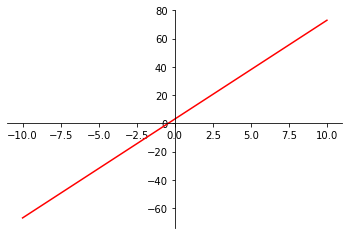

In [44]:
x = np.linspace(-10,10)
y = 7*x + 3
plt.plot(x,y,color='r')
set_spines()

Suppose we observe $n$ data pairs denoted with $(x_i,y_i), i = 1,2,...,n$.

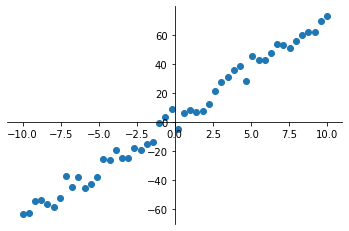

In [4]:
y = 7*x + 3 + np.random.uniform(-10,10,size=x.size)
plt.scatter(x,y)
set_spines()

We can describe the underlying relationship between $y_i$ and $x_i$ invloving the error term $\varepsilon_i$ in linear equation $y_i =  \alpha + \beta x_i + \varepsilon_i $.The  $\varepsilon_i$  could be intepreted as the noise of the data or in some sense some type of randomness originated from various reasons.Also it is know as 'error term' or 'residual'.
Our target is to find estimated values $\alpha$ and $\beta$ which would provide the best fit in some sense for data points.
In order to find the 'best' fit we will use the <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>least-squared</a> approach.From  mathematical view point the issue involved the minimization of Lost function respect to $\alpha,\beta$. 
 $$1)  L = \sum_i(y_i - \alpha - \beta x_i)^2$$.
$L$ is called $Lost$ function the expression $(y_i - \alpha - \beta x_i)^2$ is called $Cost$ function.This function is appropiative because of It is a diferencianal everywhere and gives us  a measure of diference between dependent value $y_i$ and predicted value of $y'(\alpha,\beta)=\alpha + \beta x_i $.<br>
In order to find $min_{\alpha,\beta}L(\alpha,\beta,x_i,_yi)$ we will use <mark>Gradient Descent method</mark>.<br>

<h2 id='grad~sim~linear'>1.2 Gradient Descent over simple linear regression</h2>

The methods for finding the maximum and minimum (extrema) have been created with the development of mathematical analysis(Calculus). Gradient Descent is a numerical approach to the local minimum of a first-order differentiable function. The idea is to take repeated steps in the opposite direction of the gradient the function in the current point. 


Our purpose is to find the value of $x$ where the function gets the minimum value.
The GD algorithm is difined : 
  $$\alpha = \alpha - \nabla_{\alpha}L(\alpha,\beta)*h$$
  $$\beta = \beta - \nabla_{\beta}L(\alpha,\beta)*h$$ <br>
  


where $h$ is called <mark>Learning rate</mark> or step size.
Applying GD algorithm over our Lost function 1) we  get : <br> <br>
$$\nabla_{\alpha}(J(a,b)=\frac{\partial{L}}{\partial{{\alpha}}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\alpha}}}=-\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i} $$ <br>
$$\nabla_{\beta}(J(a,b)=\frac{\partial{L}}{\partial{{\beta }}}=\frac{\partial{\sum_i(y_i - \alpha - \beta x_i)^2}}{\partial{{\beta}}}=- \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)} $$ <br> <br>


applying the above local derivatives to Gradient Descent formula we get
 $$\alpha = \alpha + \frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)*x_i}*h$$
  $$\beta = \beta +\frac{2}{n}\sum_{n=1}^{n}{(y_i-a*x_i - b)}*h$$ <br>

The above equations are performed enough times to reach the minimum of Lost function with conditional that we have chosen the appropriate Learning rate $h$.

<h2 id='grad~sim~linear'>1.3 Implementation of Gradient Descent for simple linear regression (Python)</h2>

In [5]:
#implementation cost function
def cost(X,Y,alpha,betta):
    '''
    Calculation of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    Returns :
      number of cost function
  '''
   
    return np.sum((Y - (alpha - betta*X ))**2 )

In [6]:
def gradient_descent(X,Y,C=0.1,E=100):
    '''
    
    Mimumization of cost (error) function of simple linear regression
   
    Parrameters : 
    X(array or number) : X arguments, independent variable
    Y (array or number) : Y arguments, actual dependent variable 
    C (number) :  learning rate
    I(int) : number of iteration(Epoch)
    Returns :
      number of cost function
   '''
   
    a =1 
    b = 1 
    a_args = []
    b_args =   []
    n = X.size
    
    for i in range(E):
        
        a = round(a + 2/n*(np.sum((Y - a*X - b)*X))*C,2)
        b = round( b + 2/n*(np.sum((Y - a*X -b)))*C,2)
        #print(a,b)
        a_args.append(a)
        b_args.append(b)
    return a,b,a_args,b_args 

Applying this implemenation over our generated data

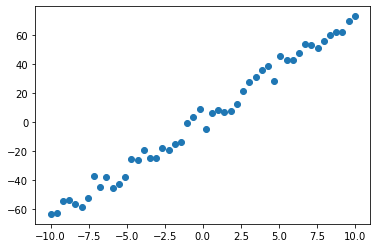

In [7]:
plt.scatter(x,y)

In [8]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.01,E=1000)

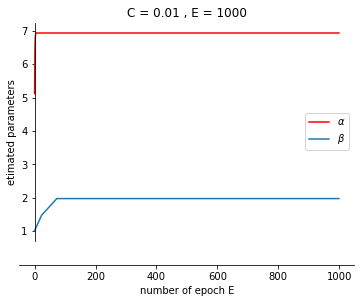

In [9]:
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.01 , E = 1000')
set_spines()
plt.legend()

From graphics we can see that the curves of $\alpha$ tends to $7$ and $\beta$ tends to $3$.
<br> 
The fit line will be : 

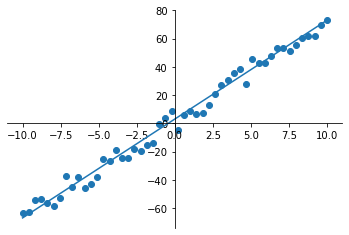

In [10]:
plt.scatter(x,y)  #7 
plt.plot(x, 7*x +  3)
set_spines()

It seems that the equation $y = 7 + 3 x$ describes the data as well as possible.

<h2 id='rates-iterations'>1.3  Different Learning rates and number of Iteration in Gradient Descent</h2>

Again let's generate the data with bigger residuals.

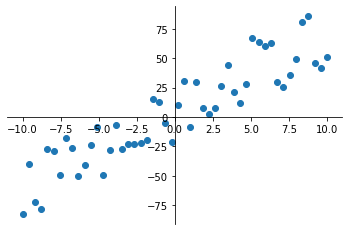

In [11]:
y = 7*x + 3 + np.random.uniform(-30,30,size=x.size)
plt.scatter(x,y)
set_spines()

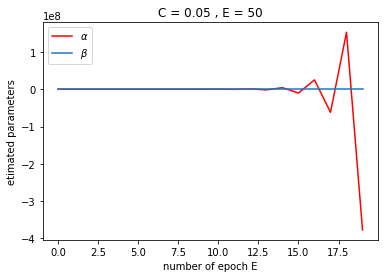

In [12]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.05,E=20)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.05 , E = 50')
#set_spines()
plt.legend()

When learning rate is 0.05 and Iter.=20 we observe the learning jump.

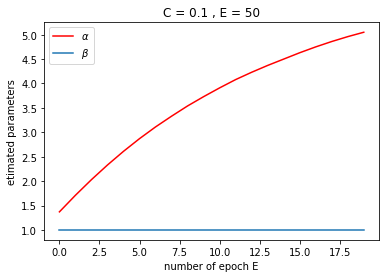

In [13]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.001,E=20)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.1 , E = 50')
#set_spines()
plt.legend()

When the learning rate is 0.03 and Iter.=20 a is 5.53 but is still increased, which means the number of iterations are small, and $\alpha$ is achieved its minimum, by increasing the iteration $\alpha$ will achieve its limit , as shown below

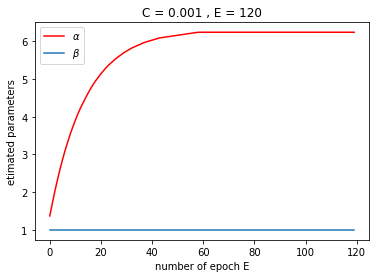

In [14]:
a,b,a_r,b_r = gradient_descent(x,y,C=0.001,E=120)
plt.plot(a_r,color='r',label=r'$\alpha $')
plt.plot(b_r,label=r'$\beta$')
plt.xlabel("number of epoch E")
plt.ylabel("etimated parameters")
plt.title('C = 0.001 , E = 120')
#set_spines()
plt.legend()

<h2 id='rates-iterations'>1.3  Regulirization </h2>

When the model fit training data too much well,that is the very bad sign.

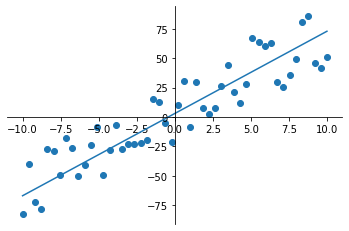

In [15]:
plt.scatter(x,y)  #7 
plt.plot(x, 7*x +  3)
set_spines()

Above graphic shows good fittin of regression line,but let consider the folowing exmple

[-9.18367347 -8.7755102  -8.36734694 -7.95918367 -7.55102041]


ValueError: operands could not be broadcast together with shapes (6,) (5,) 

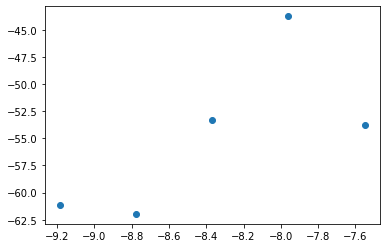

In [46]:
x_1 =x[1:7]
print(x_1)
y_1 = 7*x_1 + 3 + np.random.uniform(-10,10,size=x_1.size)
plt.scatter(x_1,y_1)
a,b,a_r,b_r = gradient_descent(x_1,y,C=0.001,E=120) 
plt.plot(x_1, a*x_1 + b)
x =x[1:7]
print(x_1)
y = 7*x + 3 + np.random.uniform(-10,10,size=x_1.size)
plt.scatter(x_1,y)
a,b,a_r,b_r = gradient_descent(x_1,y,C=0.001,E=120) 
plt.plot(x_1, a*x_1 + b)
set_spines()

[-9.59183673 -9.18367347 -8.7755102  -8.36734694 -7.95918367 -7.55102041]


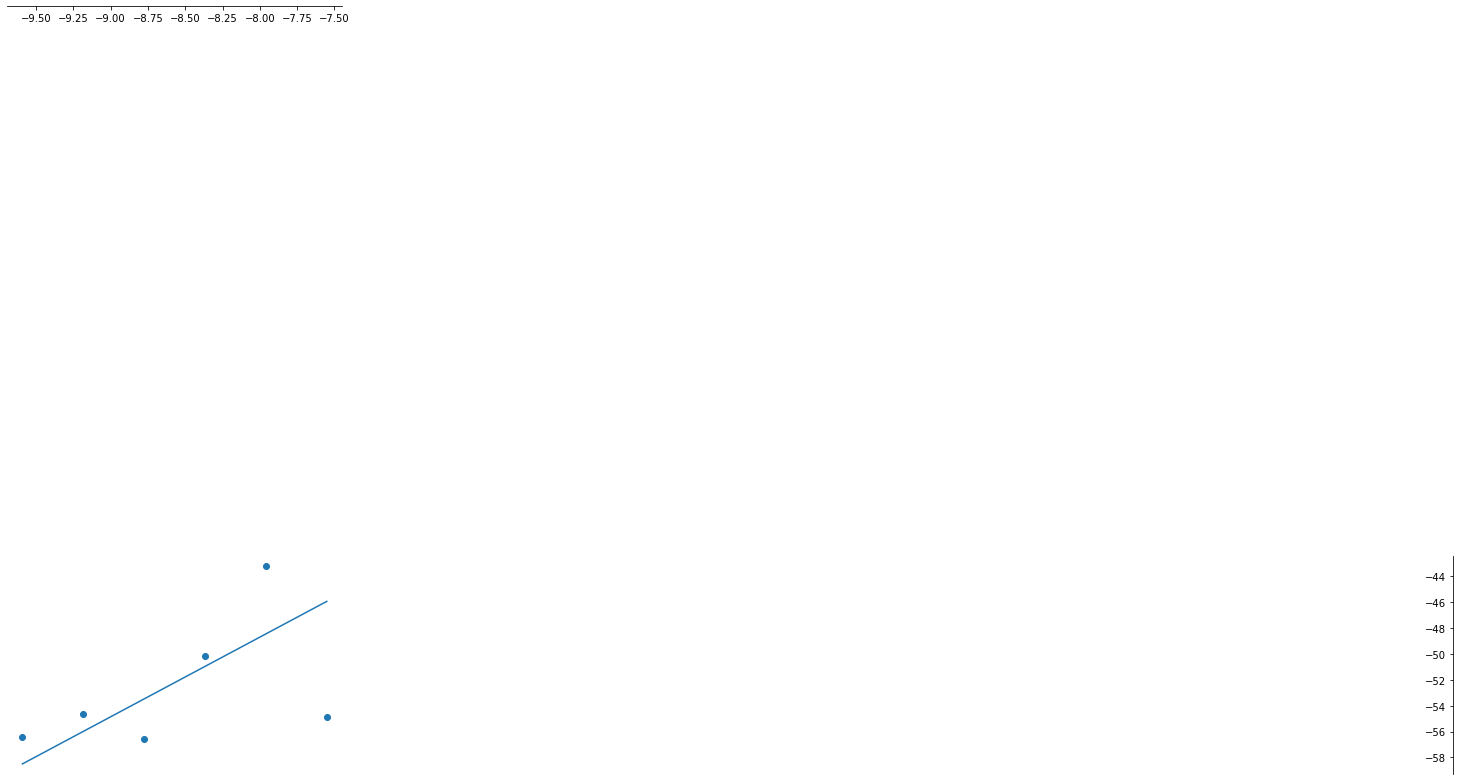

In [45]:

set_spines()

<h2> References </h2>
<ul>
    <li> </li>
<li><a href='https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/'>A comprehensive beginners guide for Linear, Ridge and Lasso Regression in Python and R </a></li>
<li> <a href='https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer'> Regularization Part 1: Ridge (L2) Regression </a> </li>
    <li><a href='https://arxiv.org/pdf/1509.09169;Lecture'>Lecture notes on ridge regression</a> </li>
    </ul>